In [1]:
#!/Tsan/bin/python
# -*- coding: utf-8 -*-

In [2]:
# Libraries to use
from __future__ import division 
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

c:\python27\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
from datetime import datetime

In [4]:
# Import My own library for factor testing
from SingleFactorTest import factorFilterFunctions as ff
#from config import *

In [5]:
%matplotlib inline

In [6]:
# assert np.any([[6,2]])

In [7]:
# Files to use 
filenamePrice = 'Own_Factor_AdjustedPriceForward-1d.csv'
filenameST = 'LZ_CN_STKA_SLCIND_ST_FLAG.h5'
filenameTradeday = 'LZ_CN_STKA_SLCIND_TRADEDAYCOUNT.h5'
filenameStopFlag = 'LZ_CN_STKA_SLCIND_STOP_FLAG.h5'
filenameIndu = 'LZ_GPA_INDU_ZX.csv'
filenameFCAP =  'LZ_CN_STKA_VAL_A_FCAP.h5'
filenameAdjustFactor = 'LZ_CN_STKA_CMFTR_CUM_FACTOR.h5'
filenameHS300 = 'LZ_CN_STKA_INDXQUOTE_CLOSE.h5'
filenameZXIndustry = 'LZ_CN_STKA_INDU_ZX.h5'  # 各股票对应的行业
filenameZXExplanation = 'LZ_GPA_TMP_INDU_ZX.csv'

In [8]:
# Factors
# Value factor
filenamePE='LZ_GPA_VAL_PE.csv'  # 市盈率
filenamePB='LZ_GPA_VAL_PB.csv'  # 市净率
filenamePS = 'LZ_GPA_VAL_PS.csv' # 市销率
filenamePCF = 'LZ_GPA_VAL_PC.csv' # 市现率
filenameADJPB ='Own_Factor_AdjustedPB-1d.csv' # 市值调整市净率

# Growth factor
filenameYOYGR = 'LZ_GPA_FIN_IND_QFA_YOYGR.csv'  # 单季度.营业总收入同比增长率(%)
filenameYOYNETPROFIT = 'LZ_GPA_FIN_IND_QFA_YOYNETPROFIT.csv' # 单季度.归属母公司股东的净利润同比增长率(%)
filenameYOYOCF = 'LZ_GPA_FIN_IND_YOYOCF.csv' # 同比增长率-经营活动产生的现金流量净额(%)
filenameYOYROE = 'LZ_GPA_FIN_IND_YOYROE.csv' # 同比增长率-净资产收益率(摊薄)(%)
filenameYOYBPS = 'LZ_GPA_FIN_IND_YOYBPS.csv' # 相对年初增长率-每股净资产(%)

# Financial factor
filenameCAPITALIZEDTODA = 'LZ_GPA_FIN_IND_CAPITALIZEDTODA.csv'  # 资本支出/折旧和摊销
filenameCASHRATIO = 'LZ_GPA_FIN_IND_CASHRATIO.csv' # 保守速动比率
filenameCASHTOLIQDEBT = 'LZ_GPA_FIN_IND_CASHTOLIQDEBT.csv' # 货币资金／流动负债
filenameOCFTODEBT = 'LZ_GPA_FIN_IND_OCFTODEBT.csv' # 经营活动产生的现金流量净额/负债合计
filenamePROFITTOOP = 'LZ_GPA_FIN_IND_PROFITTOOP.csv' # 利润总额／营业收入
filenamePROFITTOOPTTM ='LZ_GPA_FIN_DERI_COMBO_EBTTOOR_TTM.csv' # # 利润总额／营业收入(TTM)

# Momentum factor
filenameTRUEMOM = 'LZ_GPA_USR_MOM.csv' # 真动量
filenameMOM1M = 'LZ_GPA_DERI_Momentum_1M.csv' # 一月反转
filenameMOM3M = 'LZ_GPA_TURNOVER_TurnoverAvg_3M.csv' # 三月反转
filenamePVO = 'LZ_GPA_DERI_PVO.csv' # 一年偏度

filenameABNORMALVOLUME = 'LZ_GPA_DERI_NormalizedAbormalVolume.csv' # 归一化异常交易量
filenameSKEW = 'LZ_GPA_DERI_TSKEW.csv'# 偏度
filenameMACD = 'LZ_GPA_DERI_MACD.csv'  # MACD

# Liquidity factor
filenameTURNOVER1M = 'LZ_GPA_TURNOVER_TurnoverAvg_1M.csv' # 一月换手率均值
filenameAMOUNTAVG1M = 'LZ_GPA_DERI_AmountAvg_1M.csv'      #  日均成交量
filenameILLIQ = 'LZ_GPA_DERI_ILLIQ.csv'                   # 非流动性因子
filenameVOLUME = 'LZ_GPA_QUOTE_TVOLUME.csv'               # 成交量

filenameOWNILLIQ ='Own_Factor_ILLQ-1d.csv'            # 非流动性因子（自算）
filenameADJTURNOVER = 'LZ_GPA_DERI_adjustedTurnOver_20.csv' #市值调整换手率
filenameDDA = 'Own_Factor_DDA-1d.csv' # 股票每日成交额(前复权)

# Volatility factor
filenameRV1Y = 'LZ_GPA_DERI_RealizedVolatility_1Y.csv' # 一年收益波动
filenameOwnVol = 'Own_Factor_Volatility_90d.csv'   # 90天收益波动率
filenameAbove20 = 'Own_Factor_Above20MA_20d.csv'  # 高于20天MA的价格平均
filenameTOV20 = 'Own_Factor_Turnover_Volatility_20D.csv' # 20天换手率波动率
filenameADJTOV20 = 'Own_Factor_ADJ_Turnover_Volatility_20D.csv' # 20天换手率波动率（市值调整） 
filenameADJTOVD20 = 'Own_Factor_ADJ_Turnover_Volatility_Deviation_20D.csv' # 20天换手率均值除500天换手率均值-1(市值调整)
# SIZE
filenameSIZE = 'LZ_GPA_VAL_A_FCAP.csv'

In [9]:
#
filenameAroon = 'Aroon_Allstocks.csv' 
filenameDDA20 = 'Own_Factor_DDA-20d.csv' # DDA二十天均值   2012-2016 Cum return 2.2(group0), - 0.6(group9) monotonicity: Perfect
filenameIDIVOL = 'Own_Factor_Idiosyncratic_Volatility.csv' # 特异常波动率
filenamePPO ='LZ_GPA_DERI_PPO.csv' #

In [10]:
filenameOwnSkewness = 'Own_Factor_Skewness_120d.csv'  # 250日偏度

In [11]:
# Constants
# some useful parameters
startTime =  datetime.strptime('20100101', '%Y%m%d')
endTime = datetime.strptime('20170228', '%Y%m%d')

path = ff.data_path
timeStampNum = 2500
thresholdNum = 0.2
HSIndex='000300.SH' # HS300 index code
ZZ500Index = '000905.SH' #   ZZ500 index code

In [12]:
# Several dictionaries for different sorts of factors 
filenameDictValue = {'PE':filenamePE,'PB':filenamePB, 'PS':filenamePS, 'PCF':filenamePCF,'ADJPB':filenameADJPB}
filenameDictGrowth = {'YOYGR':filenameYOYGR,'YOYGRPROFIT':filenameYOYNETPROFIT,'YOYOCF':filenameYOYOCF, 'YOYROE':filenameYOYROE, 'YOYBPS':filenameYOYBPS}
filenameDicFinance = {'CAPITALIZEDTODA':filenameCAPITALIZEDTODA, 'CASHRATIO':filenameCASHRATIO, 'CASHTOLIQDEBT':filenameCASHTOLIQDEBT,\
                     'OCFTODEBT':filenameOCFTODEBT,'PROFITTOOPTTM':filenamePROFITTOOPTTM}
filenameDictMomentum = {'TRUE_MOM':filenameTRUEMOM, 'MOM_1M':filenameMOM1M , 'MOM3M':filenameMOM3M,'PVO':filenamePVO, 'RV1Y':filenameRV1Y,\
                       'ABORMALVOLUME':filenameABNORMALVOLUME,'SKEW':filenameSKEW,'MACD':filenameMACD}
filenameDictLiq = {'TURNOVER_1M':filenameTURNOVER1M, 'AMOUNTAVG1M':filenameAMOUNTAVG1M, 'ILLIQ':filenameILLIQ,'VOLUME':filenameVOLUME,\
                  'OWNILLIQ':filenameOWNILLIQ,'ADJTURNOVER':filenameADJTURNOVER,'DDA':filenameDDA}
filenameVolatility = {'VOLATILITY':filenameOwnVol}

In [13]:
filenameTest = {'PB':filenamePB, 'YOYGR':filenameYOYGR,'ILLIQ':filenameILLIQ,'TURNOVER_1M':filenameTURNOVER1M,\
                'OWNILLIQ':filenameOWNILLIQ,'MOM_1M':filenameMOM1M,'CASHRATIO':filenameCASHRATIO,'ABOVE20MA':filenameAbove20,\
               'OWNVOL':filenameOwnVol}

In [14]:
filename7factor = {'PB':filenamePB,'YOYGR':filenameYOYGR,'OCFTODEBT':filenameOCFTODEBT,'MOM_1M':filenameMOM1M,
                  'VOLATILITY':filenameOwnVol,'DDA20':filenameDDA20,'OWNILLIQ':filenameOWNILLIQ,
                  'IDIVOL':filenameIDIVOL,'ADJTOV20':filenameADJTOV20}

In [15]:
filenameDict = filename7factor

In [16]:
# total filename dictionary
#filenameDict = {'PE':filenamePE,'PB':filenamePB, 'PS':filenamePS, 'PCF':filenamePCF, 'YOYGR':filenameYOYGR,'YOYGRPROFIT':filenameYOYNETPROFIT, \
#                'TRUE_MOM':filenameTRUEMOM, 'MOM_1M':filenameMOM1M , 'MOM3M':filenameMOM3M, 'TURNOVER_1M':filenameTURNOVER1M }

# for csv file
stDF = pd.read_csv(path+filenameST,infer_datetime_format=True,parse_dates=[0],index_col=0).loc[startTime:endTime]
tradeDayDF = pd.read_csv(path+filenameTradeday,infer_datetime_format=True,parse_dates=[0],index_col=0).loc[startTime:endTime]
stopFlagDF = pd.read_csv(path+filenameStopFlag,infer_datetime_format=True,parse_dates=[0],index_col=0).loc[startTime:endTime]

In [17]:
# for h5 file
stDF = ff.readh5data(path,filenameST).loc[startTime:endTime]
tradeDayDF = ff.readh5data(path,filenameTradeday).loc[startTime:endTime]
stopFlagDF = ff.readh5data(path,filenameStopFlag).loc[startTime:endTime]

In [18]:
priceData =  pd.read_csv(path+ filenamePrice ,infer_datetime_format=True,parse_dates=[0],index_col=0).loc[startTime:endTime]
#benchMarkData = pd.read_csv(path+filenameHS300,infer_datetime_format=True,parse_dates=[0],index_col=0).loc[startTime:endTime][ZZ500Index]
benchMarkData = ff.readh5data(path, filenameHS300).loc[startTime:endTime][ZZ500Index] # for h5 file

In [19]:
#LFCAPDF = np.log10(ff.getData(thresholdNum, startTime, endTime,filename = filenameFCAP))  # for csv file
LFCAPDF = np.log10(ff.getData(thresholdNum, startTime, endTime,filename = filenameFCAP)) # for h5 file

In [20]:
endOfMonthList = ff.getLastDayOfMonth(LFCAPDF.index)[1]

In [21]:
map(lambda x: x.date().strftime("%Y%m%d"), endOfMonthList)

['20100129',
 '20100226',
 '20100331',
 '20100430',
 '20100531',
 '20100630',
 '20100730',
 '20100831',
 '20100930',
 '20101029',
 '20101130',
 '20101231',
 '20110131',
 '20110228',
 '20110331',
 '20110429',
 '20110531',
 '20110630',
 '20110729',
 '20110831',
 '20110930',
 '20111031',
 '20111130',
 '20111230',
 '20120131',
 '20120229',
 '20120330',
 '20120427',
 '20120531',
 '20120629',
 '20120731',
 '20120831',
 '20120928',
 '20121031',
 '20121130',
 '20121231',
 '20130131',
 '20130228',
 '20130329',
 '20130426',
 '20130531',
 '20130628',
 '20130731',
 '20130830',
 '20130930',
 '20131031',
 '20131129',
 '20131231',
 '20140130',
 '20140228',
 '20140331',
 '20140430',
 '20140530',
 '20140630',
 '20140731',
 '20140829',
 '20140930',
 '20141031',
 '20141128',
 '20141231',
 '20150130',
 '20150227',
 '20150331',
 '20150430',
 '20150529',
 '20150630',
 '20150731',
 '20150831',
 '20150930',
 '20151030',
 '20151130',
 '20151231',
 '20160129',
 '20160229',
 '20160331',
 '20160429',
 '20160531',

In [22]:
activeReturnData =ff.calcReturn(priceData, endOfMonthList, benchmark = benchMarkData,activeReturn = True,logReturn = True)

In [23]:
activeReturnData.iloc[activeReturnData.resample('M').size().cumsum().sub(1)]

,000005.SZ,600601.SH,600602.SH,600651.SH,600652.SH,600653.SH,600654.SH,600656.SH,000004.SZ,000002.SZ,...,300654.SZ,300706.SZ,603363.SH,603136.SH,603378.SH,002902.SZ,601086.SH,603367.SH,300705.SZ,300707.SZ
Own_Factor_AdjustedPriceForward-1d,,,,,,,,,,,,,,,,,,,,,
2010-01-29,-0.021305,-0.032857,0.041505,0.059298,0.011788,-0.012788,-0.005718,-0.063827,-0.022372,-0.048149,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-02-26,0.038216,0.083259,0.041727,0.014111,0.007877,0.046190,0.029405,0.074281,0.068030,-0.018478,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-03-31,-0.149457,-0.038162,0.000254,-0.017755,-0.075017,-0.059495,-0.043084,0.084162,-0.024822,-0.128086,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-04-30,-0.015752,0.033940,-0.082624,0.237954,-0.059042,-0.032235,-0.112834,0.133876,-0.062421,0.009819,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-05-31,-0.016239,0.054401,0.027537,-0.025638,-0.012815,0.020912,0.007570,-0.045297,0.047941,0.051876,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-06-30,0.064006,-0.030279,-0.003315,-0.079629,-0.008104,-0.021265,0.050946,-0.035283,-0.001202,0.066785,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-30,-0.048820,-0.119049,0.006435,-0.003743,-0.051387,-0.098418,-0.092574,-0.098985,0.070049,-0.075196,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-08-31,-0.123751,-0.062886,0.026253,-0.051526,0.008196,-0.012859,0.098104,0.065258,-0.008372,-0.017797,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-09-30,-0.090525,-0.014192,-0.069397,0.055871,0.135692,-0.014556,-0.057233,-0.118875,-0.028326,0.062564,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
#IndustryDF = pd.read_csv(path+filenameIndu,infer_datetime_format=True,parse_dates=[0],index_col=0).loc[endOfMonthList]  # for csv file 
IndustryDF = ff.readh5data(path,filenameZXIndustry).loc[endOfMonthList]    # for h5 file


In [25]:
IndustryDF

,000005.SZ,600601.SH,600602.SH,600651.SH,600652.SH,600653.SH,600654.SH,600656.SH,000004.SZ,000002.SZ,...,300654.SZ,300706.SZ,603363.SH,603136.SH,603378.SH,002902.SZ,601086.SH,603367.SH,300705.SZ,300707.SZ
date,,,,,,,,,,,,,,,,,,,,,
2010-01-29,23.0,25.0,25.0,16.0,2.0,13.0,25.0,10.0,18.0,23.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010-02-26,23.0,25.0,25.0,16.0,2.0,13.0,25.0,10.0,18.0,23.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010-03-31,23.0,25.0,25.0,16.0,2.0,13.0,25.0,10.0,18.0,23.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010-04-30,23.0,25.0,25.0,16.0,2.0,13.0,25.0,10.0,18.0,23.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010-05-31,23.0,25.0,25.0,16.0,2.0,13.0,25.0,10.0,18.0,23.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010-06-30,23.0,25.0,25.0,16.0,2.0,13.0,25.0,10.0,18.0,23.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010-07-30,23.0,25.0,25.0,16.0,2.0,13.0,25.0,10.0,18.0,23.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010-08-31,23.0,25.0,25.0,16.0,2.0,13.0,25.0,10.0,18.0,23.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010-09-30,23.0,25.0,25.0,16.0,2.0,13.0,25.0,10.0,18.0,23.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
# Generate the useles stock list
filterdict={}
for i in endOfMonthList:
    suspendList = ff.GetSTNewSuspend(i,stDF,tradeDayDF,stopFlagDF)
    filterdict[i] = suspendList
    print i, len(filterdict[i])

2010-01-29 00:00:00 2007
2010-02-26 00:00:00 2019
2010-03-31 00:00:00 1995
2010-04-30 00:00:00 1967
2010-05-31 00:00:00 1948
2010-06-30 00:00:00 1917
2010-07-30 00:00:00 1877
2010-08-31 00:00:00 1838
2010-09-30 00:00:00 1811
2010-10-29 00:00:00 1796
2010-11-30 00:00:00 1768
2010-12-31 00:00:00 1737
2011-01-31 00:00:00 1717
2011-02-28 00:00:00 1719
2011-03-31 00:00:00 1685
2011-04-29 00:00:00 1665
2011-05-31 00:00:00 1601
2011-06-30 00:00:00 1596
2011-07-29 00:00:00 1541
2011-08-31 00:00:00 1511
2011-09-30 00:00:00 1489
2011-10-31 00:00:00 1457
2011-11-30 00:00:00 1445
2011-12-30 00:00:00 1432
2012-01-31 00:00:00 1404
2012-02-29 00:00:00 1385
2012-03-30 00:00:00 1406
2012-04-27 00:00:00 1434
2012-05-31 00:00:00 1358
2012-06-29 00:00:00 1344
2012-07-31 00:00:00 1261
2012-08-31 00:00:00 1235
2012-09-28 00:00:00 1203
2012-10-31 00:00:00 1178
2012-11-30 00:00:00 1172
2012-12-31 00:00:00 1160
2013-01-31 00:00:00 1153
2013-02-28 00:00:00 1153
2013-03-29 00:00:00 1161
2013-04-26 00:00:00 1155


In [27]:
normalizedLFCAP = ff.winsorAndnorm(LFCAPDF, filterdict, endOfMonthList)

In [28]:
# Creat new dataframe to save the outcome
global returnofFactor
global tValueofFactor
global pValueofFactor
global ICFactor
global ICpValue
returnofFactor = pd.DataFrame(index=endOfMonthList[:-1],columns=[filenameDict.keys()],data=None,dtype = float) 
tValueofFactor = pd.DataFrame(index= endOfMonthList[:-1],columns= [filenameDict.keys()],data=None,dtype = float)
pValueofFactor = pd.DataFrame(index= endOfMonthList[:-1],columns= [filenameDict.keys()],data=None,dtype = float)
ICFactor =  pd.DataFrame(index= endOfMonthList[:-1],columns= [filenameDict.keys()],data=None,dtype = float)
ICpValue = pd.DataFrame(index= endOfMonthList [:-1],columns= [filenameDict.keys()],data=None,dtype = float)

In [29]:
pValueofFactor.tail()

,PB,OWNILLIQ,OCFTODEBT,MOM_1M,IDIVOL,VOLATILITY,ADJTOV20,DDA20,YOYGR
2016-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-11-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-12-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
#  ---------All above are global variables --------

In [31]:
def modifyUQdata(filename):
    sparedata = pd.read_csv(path+filename,infer_datetime_format=True,parse_dates=[0],index_col=0)
    uqercolumnList = sparedata.columns.tolist()
    uqercolumnName = [x.split('.')[0] for x in uqercolumnList]
    newcolumnList = stDF.columns.tolist()
    newcolumnName = [x.split('.')[0] for x in newcolumnList]
    columndict = dict(zip(newcolumnName,newcolumnList))
    finalcolumns = []
    for stk in uqercolumnName:
        if stk in newcolumnName:
            stk = columndict[stk]
        else:
            pass
        finalcolumns.append(stk)
    sparedata.columns = finalcolumns
    addNanColumns = list(set(newcolumnList) - set(sparedata.columns))
    addData = pd.DataFrame(index = sparedata.index,columns = addNanColumns,dtype =float)
    sparedata = pd.concat([sparedata,addData],axis=1)
    sparedata = sparedata[newcolumnList]
    return sparedata

In [32]:
for i,j in filenameDict.iteritems():
    print i
    print j
    if  'Uqer' in j :
        factorData = modifyUQdata(j).loc[startTime:endTime]
    else:
        factorData = ff.getData(thresholdNum,startTime,endTime,filename = j)
    normalizedData = ff.winsorAndnorm(factorData, filterdict, endOfMonthList)
    neutralizedData = ff.neutralizeFactor(normalizedData, normalizedLFCAP,IndustryDF,endOfMonthList)
    ff.calReturnAndIC(returnofFactor,tValueofFactor,pValueofFactor,ICFactor,ICpValue,neutralizedData,activeReturnData,i)

PB
LZ_GPA_VAL_PB.csv
OWNILLIQ
Own_Factor_ILLQ-1d.csv
OCFTODEBT
LZ_GPA_FIN_IND_OCFTODEBT.csv
MOM_1M
LZ_GPA_DERI_Momentum_1M.csv
IDIVOL
Own_Factor_Idiosyncratic_Volatility.csv
VOLATILITY
Own_Factor_Volatility_90d.csv
ADJTOV20
Own_Factor_ADJ_Turnover_Volatility_20D.csv
DDA20
Own_Factor_DDA-20d.csv
YOYGR
LZ_GPA_FIN_IND_QFA_YOYGR.csv


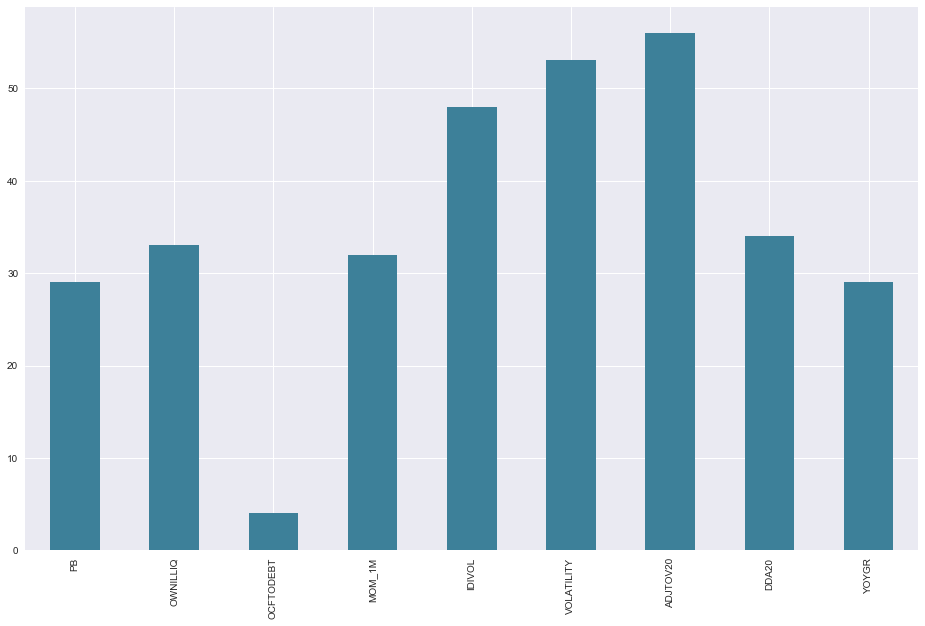

In [101]:
ICFactor[np.abs(ICFactor)>np.abs(ICFactor).mean().mean()].count().plot(figsize=(16,10),kind='bar',color=sns.color_palette("GnBu_d",2))

In [34]:
ICFactor.astype(float).describe()

,PB,OWNILLIQ,OCFTODEBT,MOM_1M,IDIVOL,VOLATILITY,ADJTOV20,DDA20,YOYGR
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
mean,-0.037998,0.032938,0.012591,-0.071990,-0.099823,-0.060037,-0.117221,-0.046860,-0.003794
std,0.088736,0.099168,0.060432,0.095679,0.088564,0.127610,0.077303,0.094356,0.099875
min,-0.234512,-0.194864,-0.382426,-0.322856,-0.319220,-0.293616,-0.299832,-0.268777,-0.262208
25%,-0.106569,-0.027501,-0.007526,-0.118918,-0.144327,-0.155278,-0.171007,-0.111086,-0.055682
50%,-0.034984,0.031997,0.012187,-0.066627,-0.097915,-0.083084,-0.115426,-0.057297,-0.001153
75%,0.030983,0.087601,0.040404,-0.011270,-0.059878,0.033511,-0.064929,0.020983,0.059111
max,0.161195,0.265200,0.203052,0.111215,0.079808,0.203073,0.077962,0.208501,0.231969


In [35]:
# Factors with positive IC
Above0df = ICFactor.astype(float)[ICFactor.astype(float)>0].describe()
Above0df

,PB,OWNILLIQ,OCFTODEBT,MOM_1M,IDIVOL,VOLATILITY,ADJTOV20,DDA20,YOYGR
count,32.000000,58.000000,54.000000,19.000000,11.000000,28.000000,6.000000,28.000000,42.000000
mean,0.050109,0.084693,0.038510,0.048025,0.047907,0.089987,0.034302,0.058251,0.074376
std,0.039339,0.065501,0.036711,0.032905,0.020193,0.060208,0.027859,0.047276,0.061170
min,0.007658,0.001588,0.001058,0.005990,0.025611,0.016934,0.008629,0.000909,0.000572
25%,0.027164,0.030911,0.012805,0.017800,0.033315,0.033923,0.010692,0.025048,0.021369
50%,0.036762,0.071949,0.031173,0.043035,0.037885,0.085035,0.030608,0.044262,0.059132
75%,0.065345,0.128280,0.051694,0.073814,0.063127,0.136725,0.048118,0.083194,0.126230
max,0.161195,0.265200,0.203052,0.111215,0.079808,0.203073,0.077962,0.208501,0.231969


In [36]:
# Factors with negative IC
Below0df = ICFactor.astype(float)[ICFactor.astype(float)<0].describe()
Below0df

,PB,OWNILLIQ,OCFTODEBT,MOM_1M,IDIVOL,VOLATILITY,ADJTOV20,DDA20,YOYGR
count,53.000000,27.000000,31.000000,66.000000,74.000000,57.000000,79.000000,57.000000,43.000000
mean,-0.091195,-0.078238,-0.032559,-0.106540,-0.121783,-0.133733,-0.128729,-0.098493,-0.080146
std,0.064308,0.059630,0.067298,0.078155,0.072057,0.076791,0.066973,0.063554,0.064949
min,-0.234512,-0.194864,-0.382426,-0.322856,-0.319220,-0.293616,-0.299832,-0.268777,-0.262208
25%,-0.133976,-0.127490,-0.032112,-0.137718,-0.151147,-0.186943,-0.175340,-0.140863,-0.106186
50%,-0.075909,-0.059509,-0.015041,-0.082370,-0.109097,-0.130510,-0.118953,-0.087340,-0.055682
75%,-0.036262,-0.030280,-0.006724,-0.052716,-0.080244,-0.083084,-0.080424,-0.057297,-0.035312
max,-0.001034,-0.002581,-0.000805,-0.003461,-0.001201,-0.008070,-0.012338,-0.004777,-0.001153


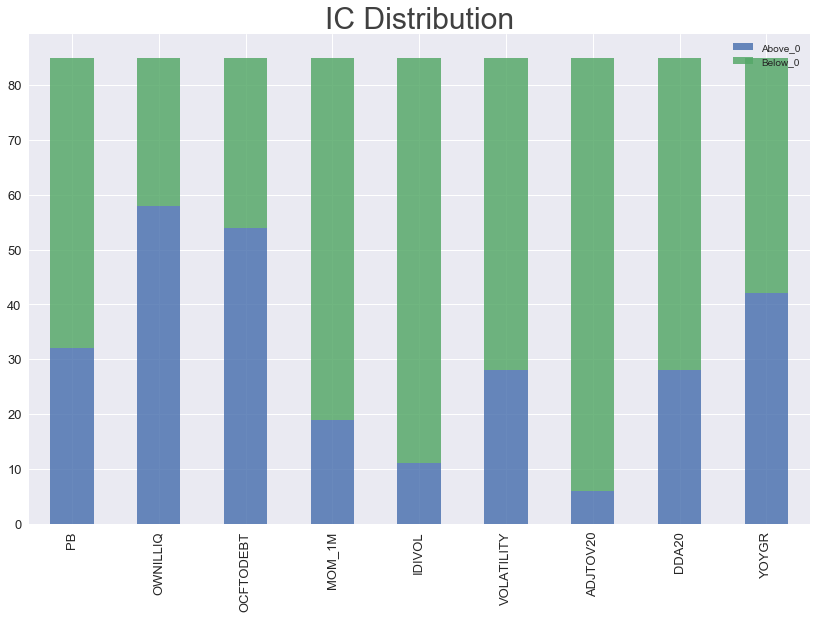

In [37]:
# show the amount of Negative IC and Positive IC in same figure
fig = plt.figure(figsize=(14,9))
ax = fig.add_subplot(111)
totaldf = pd.DataFrame({ 'Above_0':Above0df.loc['count'].values, 'Below_0':Below0df.loc['count'].values},index = Above0df.columns)
totaldf.plot(kind='bar',ax=ax, stacked =True,alpha=0.84,title ='IC Distribution',fontsize =13)
ax.set_title(ax.get_title(),alpha=0.88, fontsize=30)

In [38]:
returnofFactor.tail()

,PB,OWNILLIQ,OCFTODEBT,MOM_1M,IDIVOL,VOLATILITY,ADJTOV20,DDA20,YOYGR
2016-09-30,0.001732,0.002192,-0.000147,-0.003757,-0.002289,0.002838,-0.000032,-0.002271,-0.000352
2016-10-31,0.000876,0.003073,-0.000193,-0.005335,-0.011044,-0.015208,-0.010600,-0.007394,-0.001099
2016-11-30,0.001876,0.001984,0.001359,0.005824,0.004443,-0.006738,-0.001136,-0.008916,-0.001572
2016-12-30,-0.003148,-0.000577,-0.000148,-0.009672,-0.012396,-0.013767,-0.014588,-0.010486,-0.002488
2017-01-26,-0.001113,-0.008741,0.003330,-0.004972,-0.005537,-0.003253,-0.002865,-0.002348,-0.000432


In [39]:
ICFactor.iloc[-1] > ICFactor.mean()

PB            False
OWNILLIQ      False
OCFTODEBT      True
MOM_1M         True
IDIVOL        False
VOLATILITY    False
ADJTOV20       True
DDA20          True
YOYGR         False
dtype: bool

In [40]:
ICFactorTosave = ICFactor.apply(lambda x : x/np.abs(x).sum(),axis=1).shift(1)
#ICFactorTosave.to_csv((path+'ICfactorWeight8factorsPB.csv'))

In [41]:
ReturnTosave = returnofFactor.apply(lambda x : x/np.abs(x).sum(),axis=1).shift(1)

In [42]:
ReturnTosave.tail()

,PB,OWNILLIQ,OCFTODEBT,MOM_1M,IDIVOL,VOLATILITY,ADJTOV20,DDA20,YOYGR
2016-09-30,0.044986,0.110645,0.043878,0.056960,-0.094247,-0.299322,-0.179692,-0.153350,-0.016920
2016-10-31,0.110958,0.140455,-0.009404,-0.240712,-0.146661,0.181789,-0.002025,-0.145468,-0.022529
2016-11-30,0.015970,0.056053,-0.003529,-0.097312,-0.201455,-0.277403,-0.193353,-0.134873,-0.020053
2016-12-30,0.055413,0.058624,0.040153,0.172076,0.131259,-0.199066,-0.033552,-0.263403,-0.046454
2017-01-26,-0.046802,-0.008572,-0.002195,-0.143775,-0.184276,-0.204653,-0.216856,-0.155881,-0.036989


In [43]:
# calculate correlation between two factors
turnOver = pd.read_csv(path+filenameADJTOV20,infer_datetime_format=True,parse_dates=[0],index_col=0).loc[startTime:endTime]
illq = pd.read_csv(path+filenameOwnVol ,infer_datetime_format=True,parse_dates=[0],index_col=0).loc[startTime:endTime]
correlationDF = ff.showCorrelation(turnOver,illq, endOfMonthList, filterdic = None).astype(float)
correlationDF.describe()

,Pearson,Spearman
count,86.000000,86.000000
mean,0.350672,0.380670
std,0.130670,0.081167
min,0.074028,0.209567
25%,0.226748,0.333921
50%,0.373196,0.388375
75%,0.460104,0.438110
max,0.604413,0.575350


In [44]:
returnofFactor.cumsum().tail()

,PB,OWNILLIQ,OCFTODEBT,MOM_1M,IDIVOL,VOLATILITY,ADJTOV20,DDA20,YOYGR
2016-09-30,-0.114194,0.253588,0.017869,-0.555118,-0.627510,-0.339201,-0.769511,-0.504167,0.024789
2016-10-31,-0.113318,0.256661,0.017676,-0.560453,-0.638554,-0.354409,-0.780111,-0.511561,0.023690
2016-11-30,-0.111443,0.258646,0.019035,-0.554629,-0.634111,-0.361147,-0.781247,-0.520477,0.022117
2016-12-30,-0.114591,0.258069,0.018887,-0.564300,-0.646507,-0.374914,-0.795834,-0.530962,0.019629
2017-01-26,-0.115704,0.249328,0.022217,-0.569272,-0.652044,-0.378166,-0.798699,-0.533310,0.019197


In [45]:
returnofFactor.tail()

,PB,OWNILLIQ,OCFTODEBT,MOM_1M,IDIVOL,VOLATILITY,ADJTOV20,DDA20,YOYGR
2016-09-30,0.001732,0.002192,-0.000147,-0.003757,-0.002289,0.002838,-0.000032,-0.002271,-0.000352
2016-10-31,0.000876,0.003073,-0.000193,-0.005335,-0.011044,-0.015208,-0.010600,-0.007394,-0.001099
2016-11-30,0.001876,0.001984,0.001359,0.005824,0.004443,-0.006738,-0.001136,-0.008916,-0.001572
2016-12-30,-0.003148,-0.000577,-0.000148,-0.009672,-0.012396,-0.013767,-0.014588,-0.010486,-0.002488
2017-01-26,-0.001113,-0.008741,0.003330,-0.004972,-0.005537,-0.003253,-0.002865,-0.002348,-0.000432


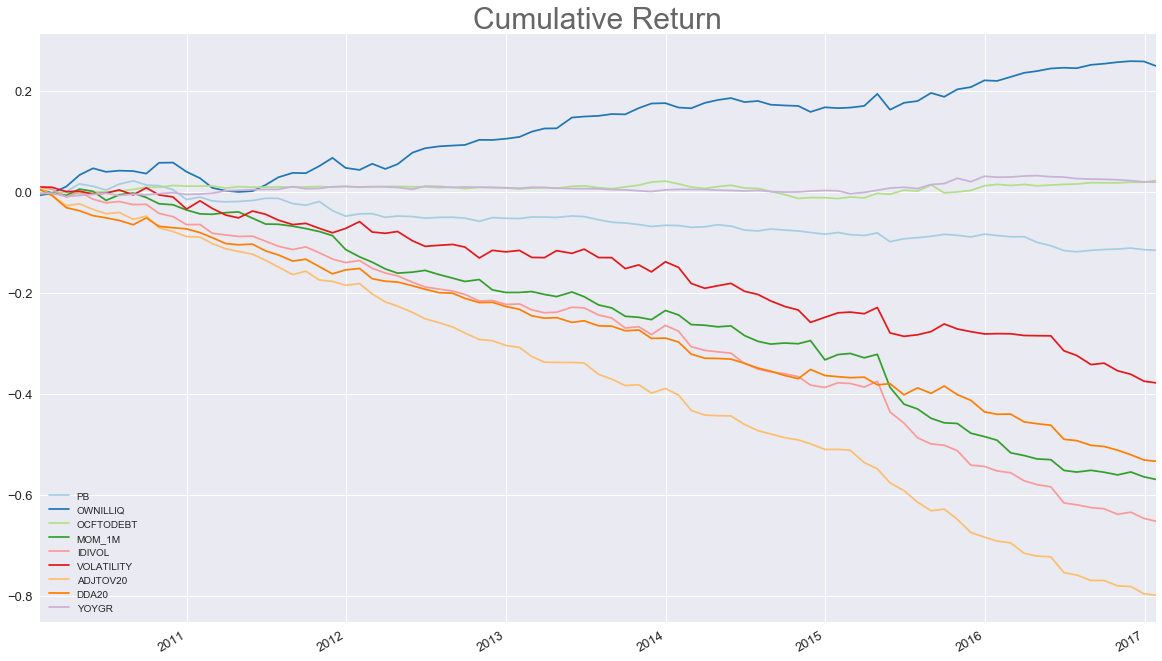

In [46]:
# simple cumulative return 
fig = plt.figure(figsize=(14,9))
# Add a subplot
ax = fig.add_subplot(111)
returnofFactor.cumsum().plot(figsize=(20,12),ax=ax,color=sns.color_palette("Paired",10),title ='Cumulative Return',fontsize =13)
ax.set_title(ax.get_title(),alpha=0.7, fontsize=30)

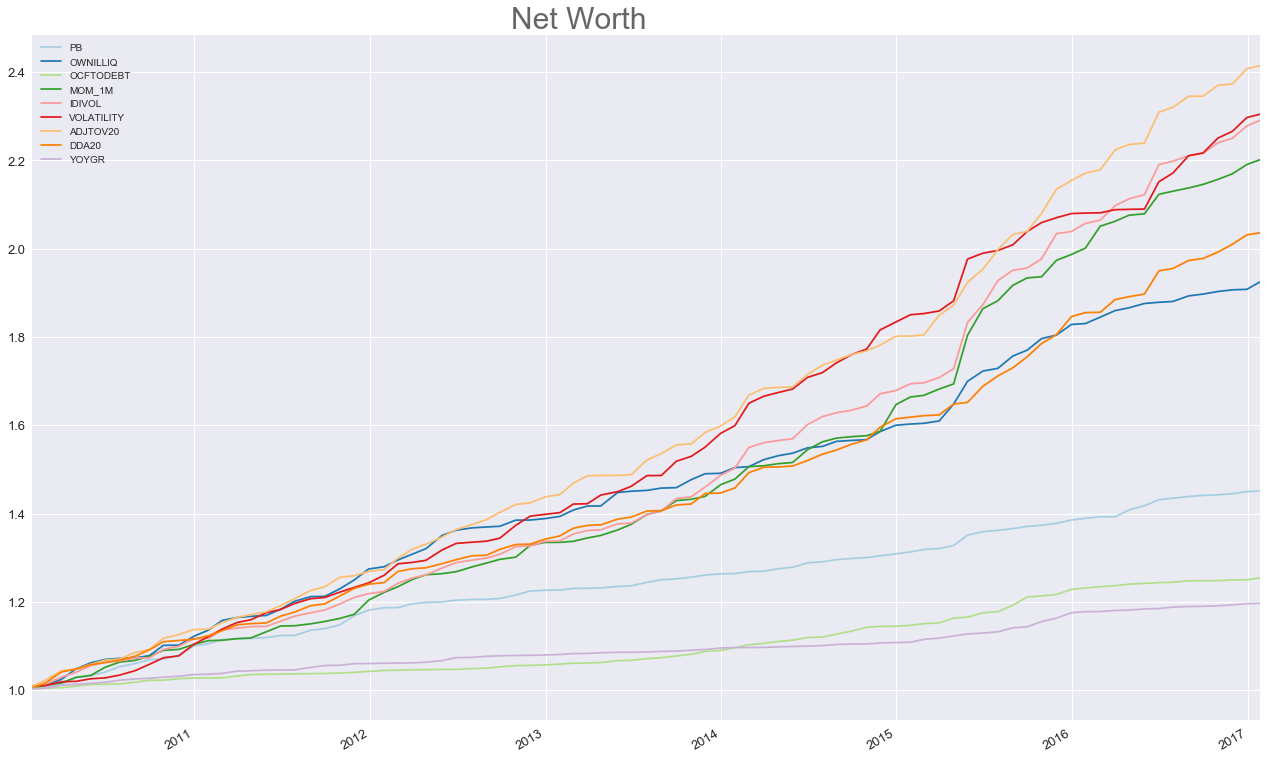

In [47]:
# Net worth plot for each factor
fig = plt.figure(figsize=(18,14))
# Add a subplot
ax = fig.add_subplot(111)
(np.abs(returnofFactor)+1).cumprod().plot(figsize=(22,14),ax=ax,color=sns.color_palette("Paired",10),title ='Net Worth',fontsize =13)
ax.set_title(ax.get_title(),alpha=0.7, fontsize=30, ha='right')

In [48]:
returnofFactor.astype(float).describe()

,PB,OWNILLIQ,OCFTODEBT,MOM_1M,IDIVOL,VOLATILITY,ADJTOV20,DDA20,YOYGR
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
mean,-0.001361,0.002933,0.000261,-0.006697,-0.007671,-0.004449,-0.009396,-0.006274,0.000226
std,0.005857,0.009938,0.003853,0.011603,0.010917,0.012121,0.008776,0.008456,0.003028
min,-0.019666,-0.031312,-0.015848,-0.065243,-0.060835,-0.050351,-0.031322,-0.027748,-0.006747
25%,-0.003371,-0.001112,-0.001749,-0.010377,-0.012396,-0.011144,-0.014588,-0.010486,-0.001353
50%,-0.001456,0.002360,0.000258,-0.005443,-0.006335,-0.004509,-0.009490,-0.006990,-0.000265
75%,0.002269,0.009069,0.002042,-0.000437,-0.002569,0.002854,-0.002545,-0.001573,0.001635
max,0.014847,0.023789,0.012454,0.018176,0.018042,0.019988,0.009195,0.018273,0.010676


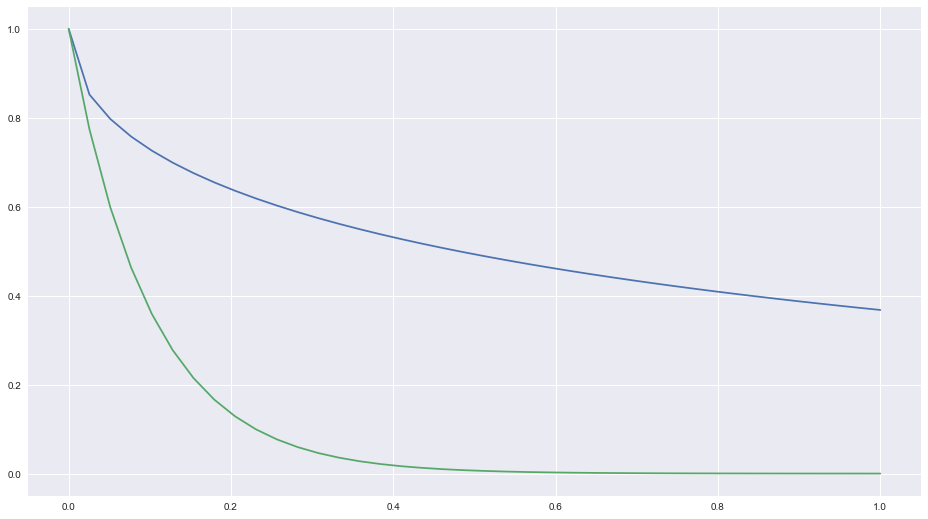

In [49]:
# show how ln function decays 
fig = plt.figure(figsize=(16,9))
x = np.linspace(0,1,40)
y = np.exp(-np.sqrt(x))
y1 = np.exp(-10*x)
plt.plot(x,y)
plt.plot(x,y1)

In [50]:
#
pWeight = np.exp(-7*pValueofFactor.astype(float)).shift(1)

In [51]:
pWeight.tail()

,PB,OWNILLIQ,OCFTODEBT,MOM_1M,IDIVOL,VOLATILITY,ADJTOV20,DDA20,YOYGR
2016-09-30,0.454558,0.996993,0.403379,0.690909,0.991773,1.000000,1.000000,0.999981,0.020826
2016-10-31,0.223847,0.352625,0.001619,0.948217,0.459416,0.624463,0.001029,0.401559,0.003705
2016-11-30,0.015762,0.509857,0.001721,0.990862,1.000000,1.000000,1.000000,0.999543,0.029818
2016-12-30,0.091640,0.067212,0.029051,0.972216,0.809359,0.989206,0.014551,0.998932,0.050387
2017-01-26,0.610991,0.004514,0.001441,0.999999,1.000000,1.000000,1.000000,0.999999,0.346139


In [52]:
returnofFactor.tail()

,PB,OWNILLIQ,OCFTODEBT,MOM_1M,IDIVOL,VOLATILITY,ADJTOV20,DDA20,YOYGR
2016-09-30,0.001732,0.002192,-0.000147,-0.003757,-0.002289,0.002838,-0.000032,-0.002271,-0.000352
2016-10-31,0.000876,0.003073,-0.000193,-0.005335,-0.011044,-0.015208,-0.010600,-0.007394,-0.001099
2016-11-30,0.001876,0.001984,0.001359,0.005824,0.004443,-0.006738,-0.001136,-0.008916,-0.001572
2016-12-30,-0.003148,-0.000577,-0.000148,-0.009672,-0.012396,-0.013767,-0.014588,-0.010486,-0.002488
2017-01-26,-0.001113,-0.008741,0.003330,-0.004972,-0.005537,-0.003253,-0.002865,-0.002348,-0.000432


In [53]:
ICweighted = ICFactorTosave * pWeight
#ICweighted.to_csv((path+'IC_Weighted_By_P_Value.csv'))
ICweighted.tail()

,PB,OWNILLIQ,OCFTODEBT,MOM_1M,IDIVOL,VOLATILITY,ADJTOV20,DDA20,YOYGR
2016-09-30,-0.042303,0.069479,0.009884,0.037270,-0.091128,-0.200887,-0.191161,-0.099074,-0.003661
2016-10-31,-0.012029,0.036149,-0.000036,-0.207245,-0.090465,-0.027629,-0.000160,-0.023229,-0.000550
2016-11-30,-0.000717,-0.019737,0.000026,-0.062711,-0.226010,-0.271626,-0.149066,-0.155608,-0.001036
2016-12-30,-0.006715,0.000216,-0.002235,0.080774,-0.002683,-0.257102,-0.002868,-0.076051,-0.011440
2017-01-26,0.083690,0.000183,0.000064,-0.068554,-0.135452,-0.152227,-0.066914,-0.203438,0.052454


In [54]:
totalWeighted = (ReturnTosave * pWeight + ICFactorTosave)
#totalWeighted .to_csv((path+'total_Weighted_By_P_Value.csv'))

In [55]:
pValueofFactor.astype(float).describe()

,PB,OWNILLIQ,OCFTODEBT,MOM_1M,IDIVOL,VOLATILITY,ADJTOV20,DDA20,YOYGR
count,8.500000e+01,8.500000e+01,85.000000,8.500000e+01,8.500000e+01,8.500000e+01,8.500000e+01,8.500000e+01,85.000000
mean,2.636163e-01,2.080045e-01,0.444171,1.095831e-01,9.248277e-02,1.286800e-01,1.167078e-01,1.514024e-01,0.487582
std,2.844219e-01,2.909902e-01,0.316376,2.121073e-01,2.041632e-01,2.599312e-01,2.530737e-01,2.581169e-01,0.292252
min,2.159800e-15,3.098704e-19,0.001458,1.422316e-45,1.873500e-48,4.254625e-37,1.994921e-45,1.902391e-31,0.000920
25%,6.796293e-03,1.911030e-05,0.129347,1.849659e-07,1.002501e-07,1.223816e-09,6.666206e-10,6.527209e-05,0.278614
50%,1.634074e-01,9.706266e-03,0.416271,2.812398e-03,2.746147e-04,1.015882e-03,7.878617e-06,3.380437e-03,0.481673
75%,4.498290e-01,3.978272e-01,0.708922,7.825169e-02,4.916148e-02,9.520954e-02,3.350580e-02,1.528149e-01,0.739195
max,9.938801e-01,9.211263e-01,0.996050,9.633763e-01,8.496343e-01,9.395319e-01,9.926593e-01,8.863995e-01,0.973575


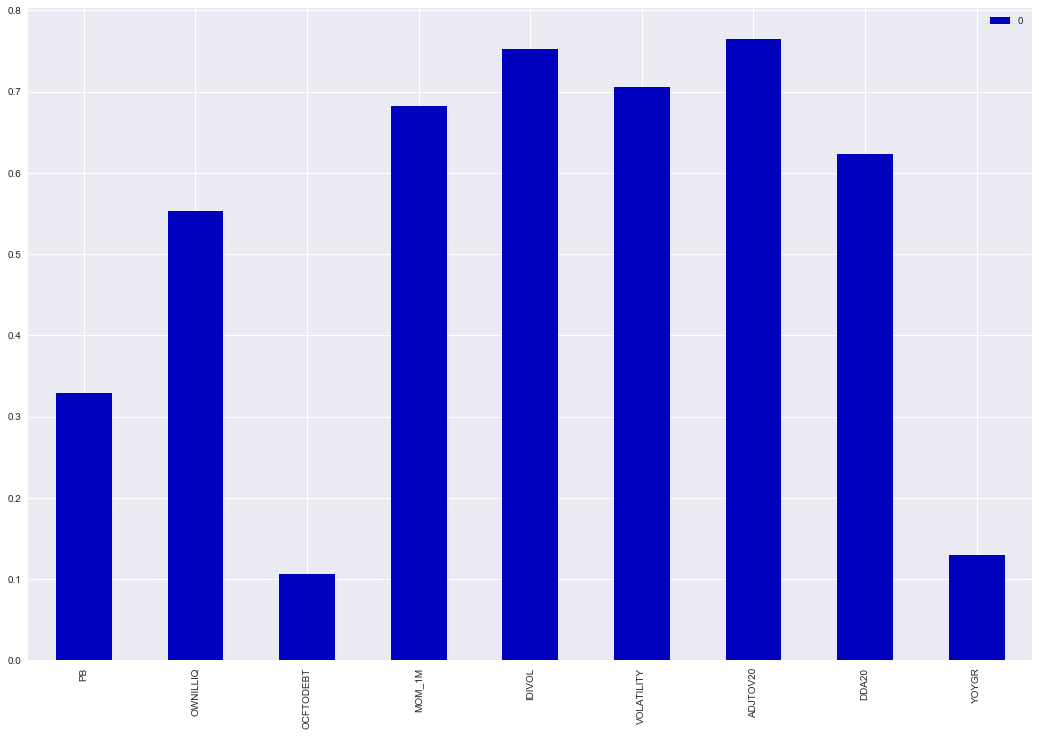

In [108]:
pd.DataFrame(pValueofFactor[pValueofFactor<0.05].count()/len(pValueofFactor)).plot(figsize=(18,12),kind='bar',color=my_colors )

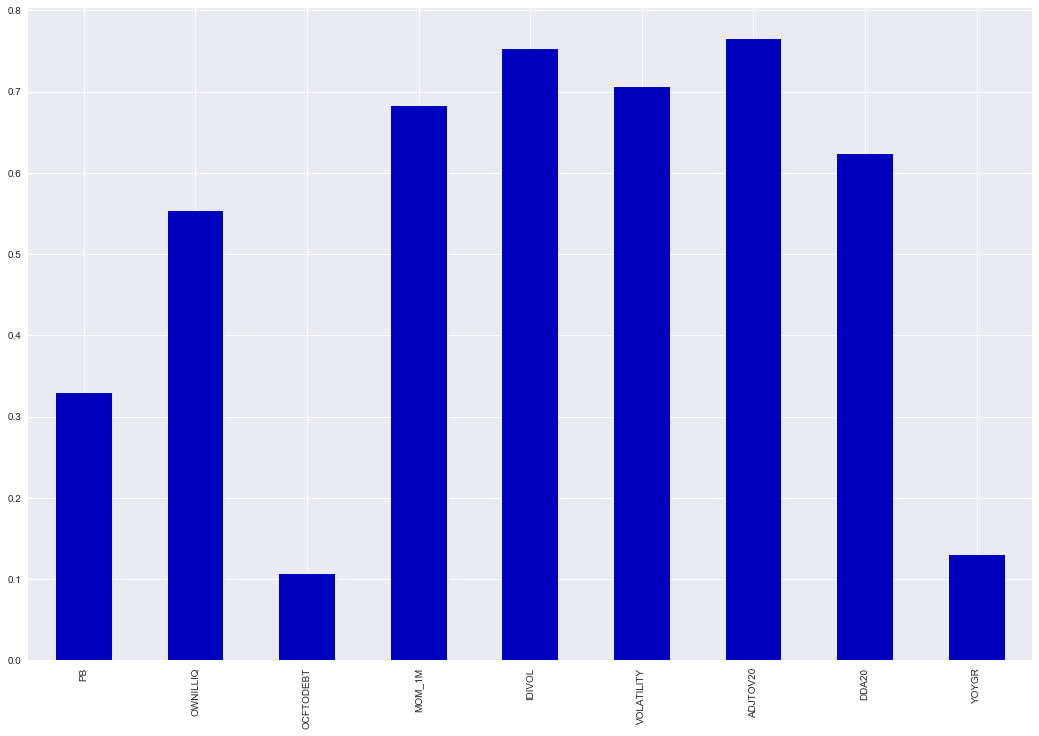

In [104]:
#color_set=sns.light_palette((210, 90, 60), input="husl")
my_colors = [(x/10.0, x/20.0, 0.75) for x in range(pValueofFactor.shape[0])] 
(pValueofFactor[pValueofFactor<0.05].count()/len(pValueofFactor)).plot(figsize=(18,12),kind='bar',color=my_colors )

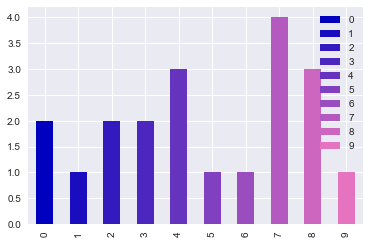

In [114]:
from itertools import cycle, islice
x = [{i:np.random.randint(1,5)} for i in range(10)]
df = pd.DataFrame(x)
my_colors = ['g', 'b']*5 # <-- this concatenates the list to itself 5 times.
my_colors = [(0.5,0.4,0.5), (0.75, 0.75, 0.25)]*5 # <-- make two custom RGBs and repeat/alternate them over all the bar elements.
my_colors = [(x/10.0, x/20.0, 0.75) for x in range(len(df))] 

# Specify this list of colors as the `color` option to `plot`.
df.plot(kind='bar', stacked=True, color=my_colors)

In [57]:
ReturnForPlot = returnofFactor.copy()
ReturnForPlot.index = ReturnForPlot.index.map(lambda x:100*x.year+(1+x.month) if x.month<12 else\
                                             100*(x.year+1)+1)

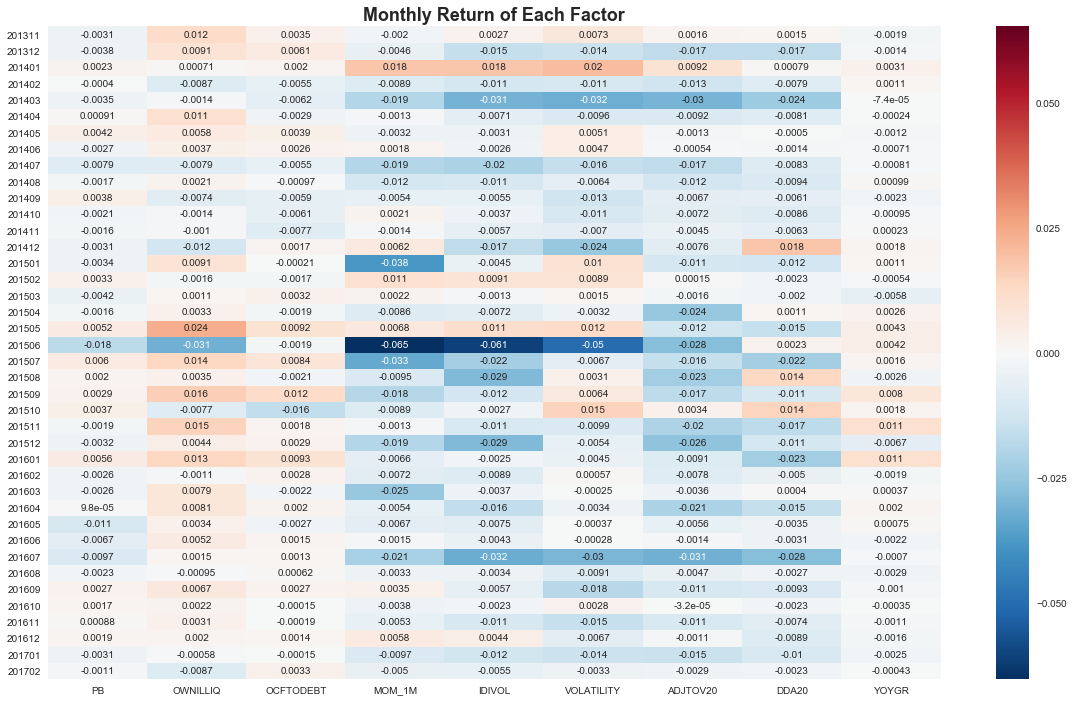

In [58]:
ReturnForPlot = ReturnForPlot.astype(float)

plt.figure(figsize=(20,12))
ax = plt.axes()
sns.heatmap(ReturnForPlot[-40:],ax=ax, annot=True)
ax.set_title('Monthly Return of Each Factor',fontsize=18, fontweight='bold')
plt.show()